In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [113]:
df = pd.read_csv('./datasets/Date_Fruit_Datasets.csv')

In [114]:
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [116]:
df['Class'].value_counts()

DOKOL     204
SAFAVI    199
ROTANA    166
DEGLET     98
SOGAY      94
IRAQI      72
BERHI      65
Name: Class, dtype: int64

In [123]:
dum_df = pd.get_dummies(df, columns=['Class'], prefix=["var_is"] )

dum_df

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,var_is_BERHI,var_is_DEGLET,var_is_DOKOL,var_is_IRAQI,var_is_ROTANA,var_is_SAFAVI,var_is_SOGAY
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,58.7255,54.9554,47.8400,1,0,0,0,0,0,0
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,50.0259,52.8168,47.8315,1,0,0,0,0,0,0
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,65.4772,59.2860,51.9378,1,0,0,0,0,0,0
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,43.3900,44.1259,41.1882,1,0,0,0,0,0,0
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,52.7743,50.9080,42.6666,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,...,49.0869,43.0422,42.4153,0,0,0,0,0,0,1
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,...,46.8086,39.1046,36.5502,0,0,0,0,0,0,1
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,...,44.1325,40.7986,40.9769,0,0,0,0,0,0,1
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,...,51.2267,45.7162,45.6260,0,0,0,0,0,0,1


In [125]:
corr = dum_df.corr()

In [126]:
corr.iloc[-7:,:]

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,var_is_BERHI,var_is_DEGLET,var_is_DOKOL,var_is_IRAQI,var_is_ROTANA,var_is_SAFAVI,var_is_SOGAY
var_is_BERHI,0.278644,0.179856,0.125253,0.339457,-0.365717,0.262512,0.186510,0.266666,0.157479,-0.013215,...,-0.012706,-0.010730,-0.097544,1.000000,-0.097769,-0.151450,-0.082473,-0.133025,-0.149047,-0.095515
var_is_DEGLET,-0.210786,-0.193215,-0.171597,-0.170394,0.075468,-0.178917,0.047813,-0.213745,0.160025,-0.011418,...,0.207055,0.168573,0.211807,-0.097769,1.000000,-0.189759,-0.103334,-0.166673,-0.186748,-0.119675
var_is_DOKOL,-0.774658,-0.822071,-0.801956,-0.725977,0.157792,-0.803004,0.160302,-0.781778,0.190518,-0.017206,...,0.396281,0.439891,0.416098,-0.151450,-0.189759,1.000000,-0.160071,-0.258187,-0.289283,-0.185384
var_is_IRAQI,0.373751,0.254607,0.174899,0.435482,-0.474192,0.341175,0.182801,0.361453,0.151828,-0.014410,...,-0.181060,-0.147378,-0.192373,-0.082473,-0.103334,-0.160071,1.000000,-0.140597,-0.157530,-0.100951
var_is_ROTANA,0.394618,0.370302,0.270102,0.433690,-0.271328,0.384195,-0.041605,0.398467,0.003608,-0.019761,...,0.345114,0.319595,0.362654,-0.133025,-0.166673,-0.258187,-0.140597,1.000000,-0.254089,-0.162830
var_is_SAFAVI,0.179568,0.353543,0.483887,-0.034498,0.535062,0.203230,-0.247393,0.194058,-0.490545,0.070476,...,-0.811147,-0.748226,-0.707581,-0.149047,-0.186748,-0.289283,-0.157530,-0.254089,1.000000,-0.182442
var_is_SOGAY,-0.036438,-0.005327,0.012270,-0.009568,0.055509,-0.006432,-0.199742,-0.027170,-0.030793,-0.011407,...,0.080951,-0.024098,-0.031912,-0.095515,-0.119675,-0.185384,-0.100951,-0.162830,-0.182442,1.000000


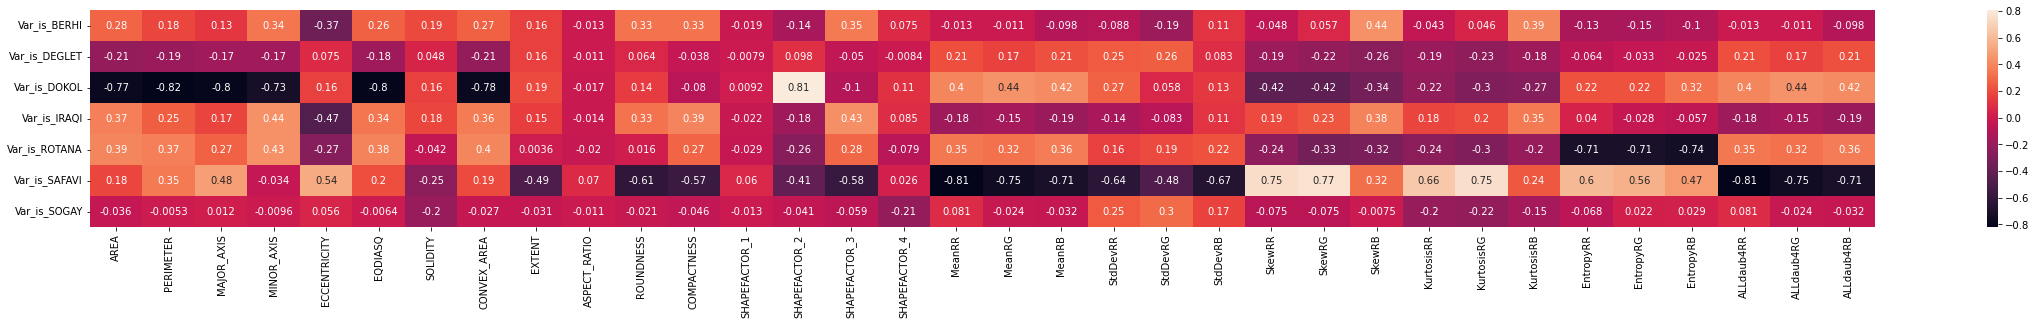

In [122]:
plt.figure(figsize=(40, 4))
sns.heatmap(corr.iloc[-7:,:-7], annot=True);

In [129]:
X = dum_df.iloc[:,:-7]
y = dum_df.iloc[:,-7:]

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)

In [131]:
scaler = StandardScaler()

In [132]:
X_train_std = scaler.fit_transform(X_train) #aplicando a transformação
X_test_std = scaler.transform(X_test)

In [134]:
model = KNeighborsClassifier()

In [141]:
# from sklearn.model_selection import KFold, cross_validate

# grupo = KFold(n_splits=10, shuffle=True, random_state=42)

# # from sklearn.metrics import make_scorer, f1_score

# metrica = 'f1_weighted'

# results = cross_validate(estimator=model,
#                          X=X_train_std, y=y_train,
#                          cv=grupo,
#                          scoring=metrica,
#                          return_train_score=True)

In [143]:
# pd.DataFrame(results)

In [11]:
model.fit(X_train_std, y_train)

KNeighborsClassifier()


# ====================

[[12  0  0  1  0  0  0]
 [ 0 17  2  0  0  1  0]
 [ 0  1 39  0  0  0  1]
 [ 0  0  0 14  0  0  0]
 [ 0  1  0  0 31  0  1]
 [ 0  0  0  0  0 39  1]
 [ 0  2  0  0  3  0 14]] 




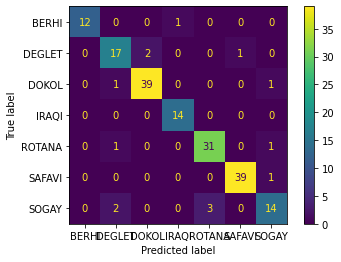

              precision    recall  f1-score   support

       BERHI       1.00      0.92      0.96        13
      DEGLET       0.81      0.85      0.83        20
       DOKOL       0.95      0.95      0.95        41
       IRAQI       0.93      1.00      0.97        14
      ROTANA       0.91      0.94      0.93        33
      SAFAVI       0.97      0.97      0.97        40
       SOGAY       0.82      0.74      0.78        19

    accuracy                           0.92       180
   macro avg       0.91      0.91      0.91       180
weighted avg       0.92      0.92      0.92       180



In [80]:
print("\n# ====================\n")

y_pred_test = model.predict(X_test_std)

print(confusion_matrix(y_test, y_pred_test), '\n\n')

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test));


# ====================

[[ 44   0   0   3   3   0   2]
 [  0  69   3   0   0   0   6]
 [  0   6 157   0   0   0   0]
 [  4   0   0  51   2   0   1]
 [  0   1   0   0 131   0   1]
 [  0   0   0   0   0 157   2]
 [  0   7   0   0   1   2  65]] 




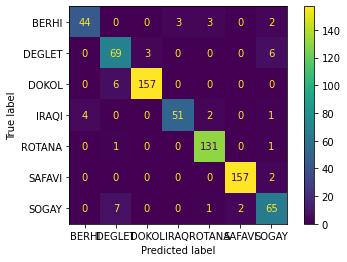

              precision    recall  f1-score   support

       BERHI       0.92      0.85      0.88        52
      DEGLET       0.83      0.88      0.86        78
       DOKOL       0.98      0.96      0.97       163
       IRAQI       0.94      0.88      0.91        58
      ROTANA       0.96      0.98      0.97       133
      SAFAVI       0.99      0.99      0.99       159
       SOGAY       0.84      0.87      0.86        75

    accuracy                           0.94       718
   macro avg       0.92      0.92      0.92       718
weighted avg       0.94      0.94      0.94       718



In [73]:
print("\n# ====================\n")

y_pred_train = model.predict(X_train_std)

print(confusion_matrix(y_train, y_pred_train), '\n\n')

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))